# Title: Detecting lane lines

Table of contents:
1. Description of libraries used.
2. Read a sample image of road and convert it to grayscale.
3. Apply Gaussian smoothing.
4. Apply Canny Edge algorithm to detect the edges.
5. Mask unwanted part of image (ignore everything outside region of interest)

[Extra] : Converting a video into frames.

### 1. Libraries used:
    1.1 matplotlib
    1.2 numpy
    1.3 cv2
    1.4 moviepy
    1.5 imageio


In [1]:
import matplotlib.pyplot as plt


Provides a MATLAB-like plotting framework. This is very convenient for interactive work as mathematical plots can 
be easily done.
This imports the module "matplotlib.pyplot" and binds that to the name "plt".

In [2]:
import matplotlib.image as mpimg

This image module supports basic image loading, rescaling and display operations. This imports the module "matplotlib.image" and binds that to the name "mpimg"

In [3]:
import cv2

OpenCV (Open Source Computer Vision) is a library of programming functions mainly aimed at real-time computer vision.
OpenCV has a modular structure, which means that the package includes several shared or static libraries.

In [4]:
import numpy as np

NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. It is the short form for numerical python package. 

### 2. Read image and apply grayscale.

In [5]:
image = mpimg.imread('test_image1.jpeg') 

Reading the image using the function mpimg.imread() while accessing the library matplot.image. 

In [6]:
print('Image Dimensions: ', image.shape)

Image Dimensions:  (440, 640, 3)


The image dimensions are displayed.

In [7]:
plt.figure() 

Creating the figure. 

In [8]:
plt.imshow(image) 

This function draws image onto the frame.

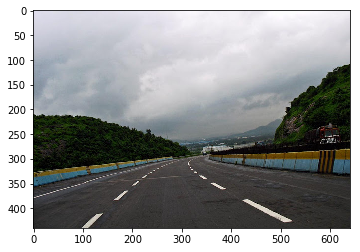

In [9]:
plt.show() 

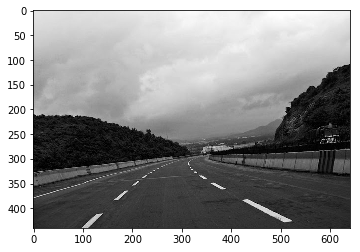

In [10]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(gray_image , cmap='gray') 
plt.show()

cvtColor() converts image from one color space to another. Here, the image is converted to grayscale. The converted image is assigned to a variable 'gray_image'. 

### 3. Applying Gaussian blur to an image

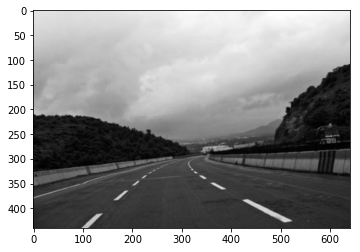

In [11]:
blur_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
plt.imshow(blur_image , cmap='gray')
plt.show()

Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noises. It actually removes high frequency content (eg: noise, edges) from the image. We should specify the width and height of kernel which should be positive and odd.

### 4. Applying Canny edge detection algorithm on processed image



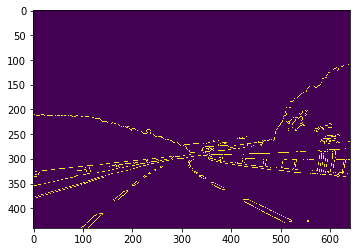

In [12]:
gray_blur_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
canny_edges_image = cv2.Canny(gray_blur_image, 50, 150)
plt.imshow(canny_edges_image)
plt.show()

Canny edge detection is a popular edge detection algorithm where the edges are detected. Here, the image is one of the input parameters of the canny function. 


### Comparison of edge detection techniques:


1.Sobel Operator
    The operator consists of a pair of 3X3 convolution kernels.One kernel is simply the other rotated by 90'.
    These kernels are designed to respond maximally to edges running vertically and horizontaly relative to 
    pixel grid.The kernels can be applied separately to the input image,to produce separate measurements of 
    the gradient component in each orientation.
    
2.Robert's cross operator
    This operator performs a simple,quick to compute,2-D spatial gradient measurement on an image.This operator 
    consists of 2X2 concolution kernels.This is very similar to Sobel operator.
    
    
3.Canny Edge Detection Algorithm
    First step is to filter noise in the original image before trying to detect any edges.After filtering noise,
    Gaussian smoothening can be performed using standard convolution method.
    
    Second step is to find the edge strength by taking gradient of the image.
        
    Third step computes the direction of edge using the gradient in x and y direction.When the gradient in x 
    direction is equal to zero,the edge direction has to be equal to 90' or 0'.
    
    Fourth step relates the edge direction to a direction that can be traced in an image.
    
    In the Fifth step,non-maximum suppression has to be applied which is used to trace along the edge in the edge 
    direction .This will give a thin line in the output image.
    
    In the Sixth step,hysteresis is used to eliminate streaking.Streaking is the breaking up of an edge contour
    caused by the operator output fluctuating above and below the threshold.Hysteresis uses 2 thresholds a high
    and low.
    

Canny edge algorithm yielded the best results as compared  with the above 2.This was expected as this algorithm 
accounts for regions in an image.Algorithm yields thin lines for its edges by using non-maximal suppression.
Sobel and Robert's operator produced inaccurate ouputs and they are sensitive to noise.

Hence we are using Canny edge algorithm for lane detection.

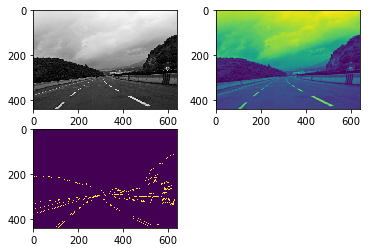

In [13]:
plt.subplot(2,2,1)
plt.imshow(gray_image, cmap="gray")
plt.subplot(2,2,2)
plt.imshow(blur_image)
plt.subplot(2,2,3)
plt.imshow(canny_edges_image)
plt.show()

Plotting multiple images. plt.subplot() helps in plotting multiple images within a single window. 

### 5. Mask edges of an image. 

In [14]:
imshape = canny_edges_image.shape 

vertices = np.array([[(0,imshape[0]),(465, 320), (475, 320), (imshape[1],imshape[0])]], dtype=np.int32)

mask = np.zeros_like(canny_edges_image)  #defining a blank mask 
    
#defining a 3 channel or 1 channel color to fill the mask with depending on the input image    
if len(canny_edges_image.shape) > 2:
    channel_count = canny_edges_image.shape[2]  
    ignore_mask_color = (255,) * channel_count
else:
    ignore_mask_color = 255 

cv2.fillPoly(mask, vertices, ignore_mask_color) #filling pixels inside the polygon defined by "vertices" with the fill color 

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ..., 
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255, 255,   0],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

Filling pixels inside the polygon defined by "vertices" with the fill color.

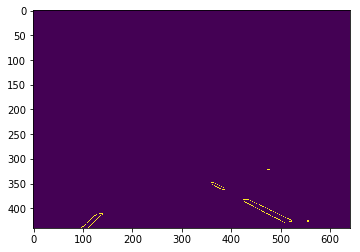

In [15]:
masked_image = cv2.bitwise_and(canny_edges_image, mask) #returning the image only where mask pixels are nonzero
plt.imshow(masked_image)
plt.show()

That image is returned where mask pixels are non-zero. 

### Converting a video into frames

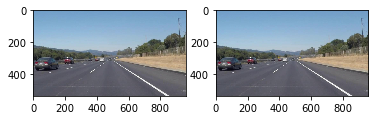

In [16]:
from moviepy.editor import VideoFileClip

clip1 = VideoFileClip("test.mp4")  #read video
clip2 = VideoFileClip("test.mp4").subclip(5,6) #select the subclip between t=5s and t=6s
clip2.save_frame("genrated_frame.jpeg") #save frame at 0s
image1 = mpimg.imread("genrated_frame.jpeg")

clip1.save_frame("genrated_frame.jpeg", t=5) #save frame at 5s
image2 = mpimg.imread("genrated_frame.jpeg")

plt.subplot(2,2,1)
plt.imshow(image1)
plt.subplot(2,2,2)
plt.imshow(image2)
plt.show()


Moviepy is a python library for video editing. The functions used are VideoFileClip() meaning the clip is read and a subclip is selected.
Then using function name.save-frame(), the frame is saved and we get the frame. 

### References

1. docs.opencv.org
2. OpenCV-Python Tutorials Documentation Release 1 by Alexander Mordvintsev & Abid K
3. matplotlib.org
4. numpy.org
5. zulko.github.io/moviepy/
